# Gerador de Sinais

## Sinal senoidal

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scienceplots

%config InlineBackend.figure_format="retina"
plt.style.use(["science", "notebook"])

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Sinal Senoidal

In [4]:
def onda_senoidal(freq, ampl, offset):
    Ts = 0.02
    print(f"Frequência de Amostragem: {1./Ts}")

    t = 0
    x = np.zeros(100)
    y = np.zeros(100)

    for i in range(100):
        x[i] = t
        y[i] = ampl*np.sin(2*np.pi*freq*t) + offset
        t += Ts

    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(111)
    ax.axhline(0,color='black', lw=1.2)
    ax.axvline(0,color='black', lw=1.2)
    ax.set_title("Gráfico senoidal", fontsize=12)
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Amplitude (V)")
    ax.plot(x, y)
    plt.grid(which='both')
    plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
    plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)
    plt.show()

Frequência de Amostragem: 50.0


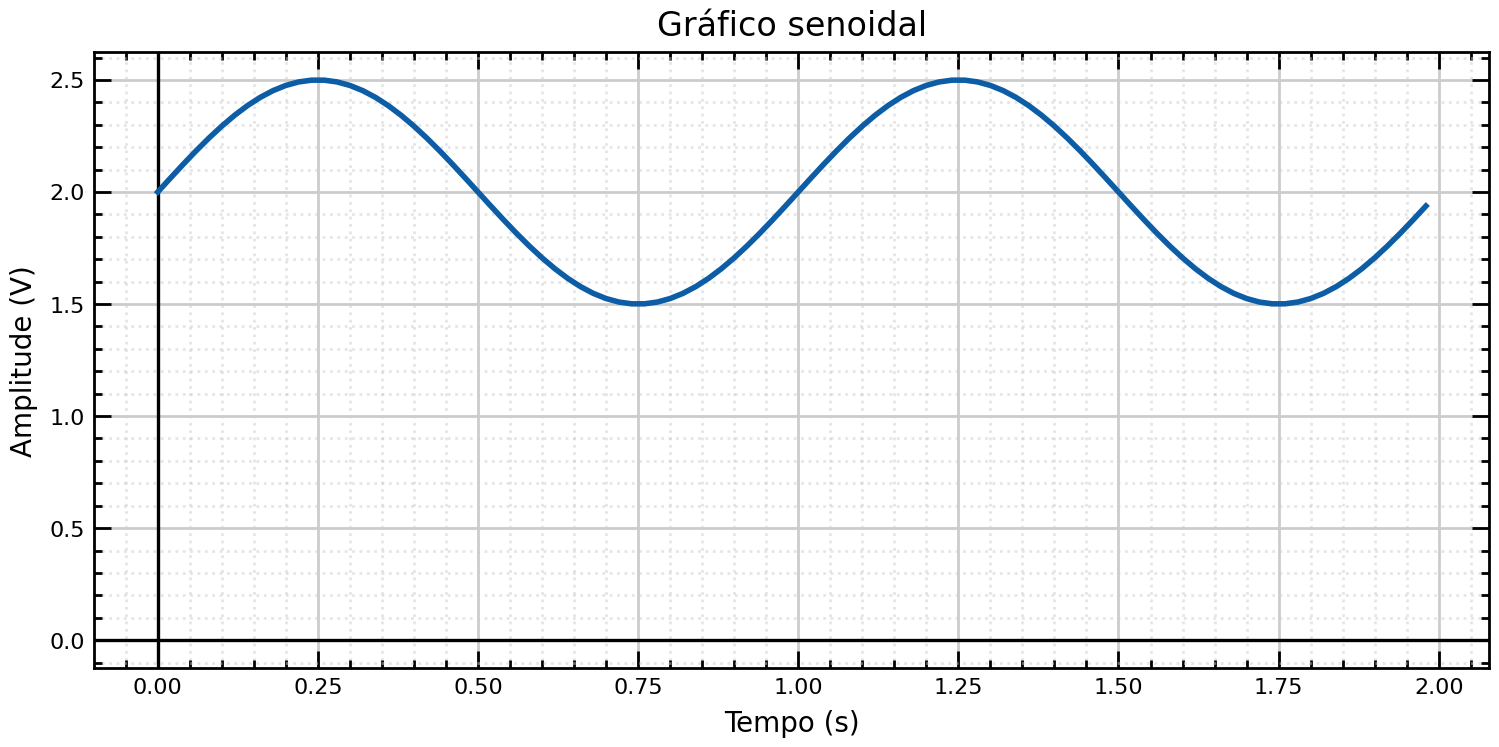

In [5]:
# Parâmetros do sinal
freq = 1
ampl = 0.5
offset = 2

onda_senoidal(freq, ampl, offset)

Frequência de Amostragem: 50.0


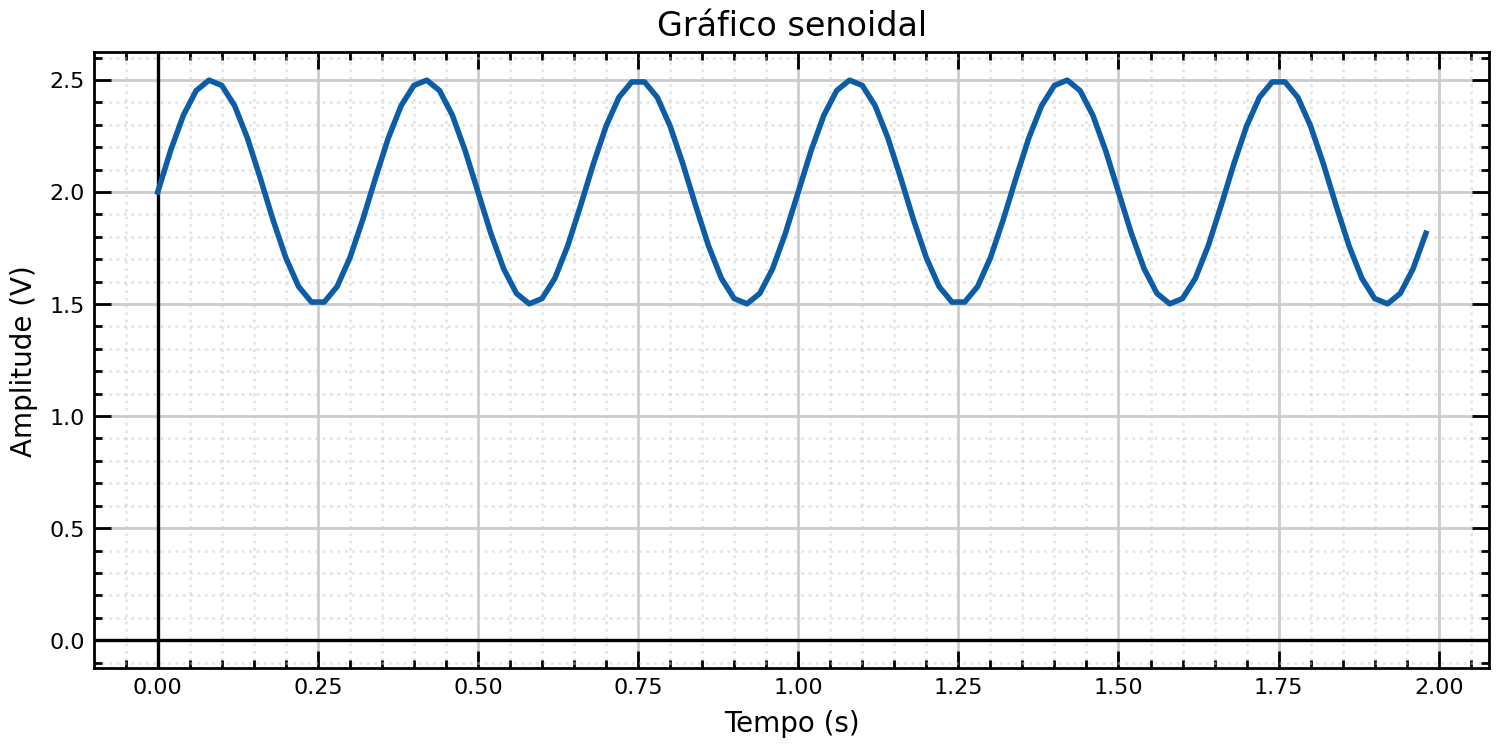

In [6]:
# Parâmetros do sinal
freq = 3
ampl = 0.5
offset = 2

onda_senoidal(freq, ampl, offset)

### Sinal Onda Quadrada

In [7]:
def onda_quadrada(freq, ampl, offset, N=200, Ts=0.002):
    Tsf = 1.0/freq
    print(f"Frequência de Amostragem: {1./Ts}")

    t = 0
    x = np.zeros(N)
    y = np.zeros(N)
    temp = 0.0

    for i in range(N):
        temp += Ts
        if temp <= Tsf/2:
            x[i] = t
            y[i] = ampl + offset
        if temp >= Tsf/2:
            x[i] = t
            y[i] = offset
        if temp >= Tsf:
            temp = 0.0
        t += Ts

    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(111)
    ax.axhline(0,color='black', lw=1.2)
    ax.axvline(0,color='black', lw=1.2)
    ax.set_title("Gráfico senoidal", fontsize=12)
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Amplitude (V)")
    ax.plot(x, y)
    plt.grid(which='both')
    plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
    plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)
    plt.show()

Frequência de Amostragem: 50.0


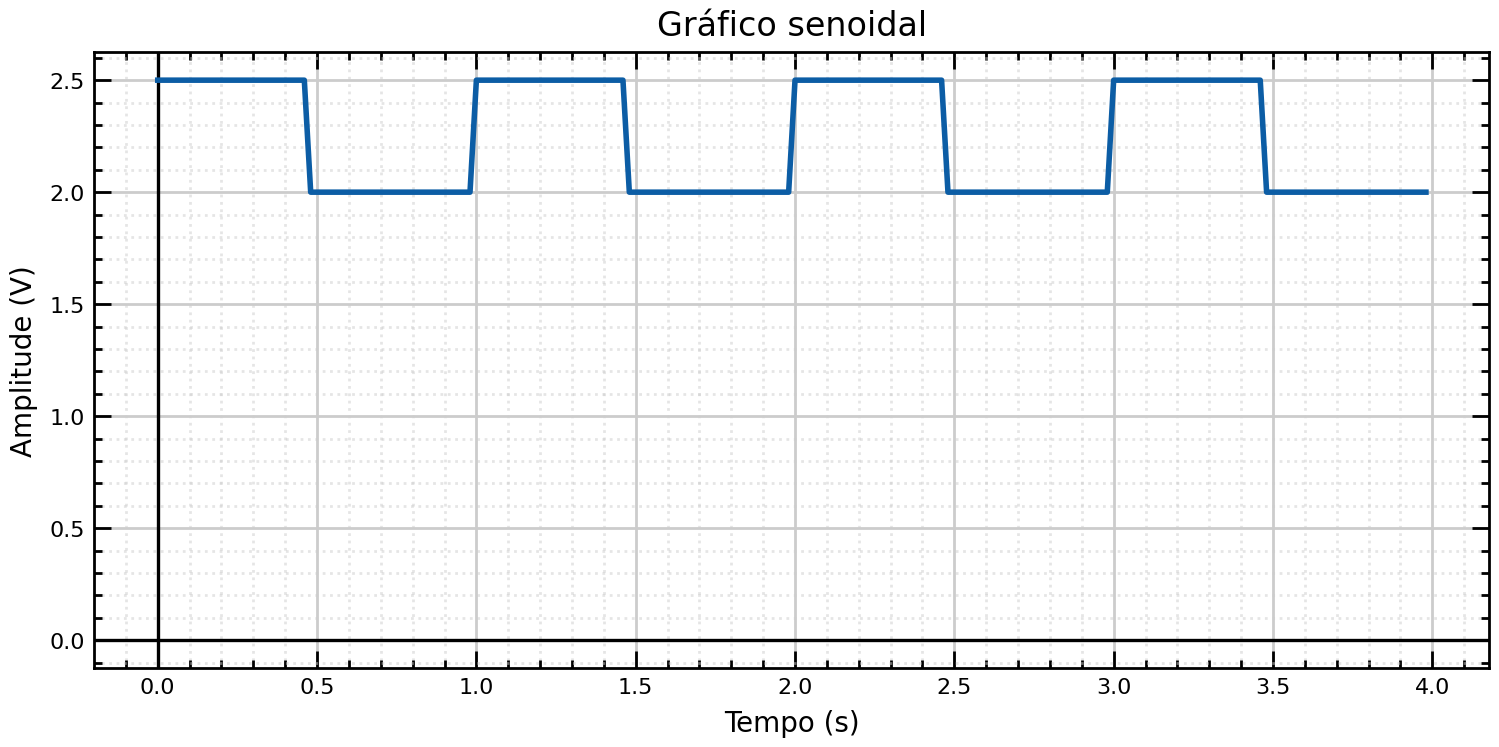

In [8]:
# Parâmetros do sinal
freq = 1
ampl = 0.5
offset = 2

onda_quadrada(freq, ampl, offset, 200, 20e-3)

Frequência de Amostragem: 500.0


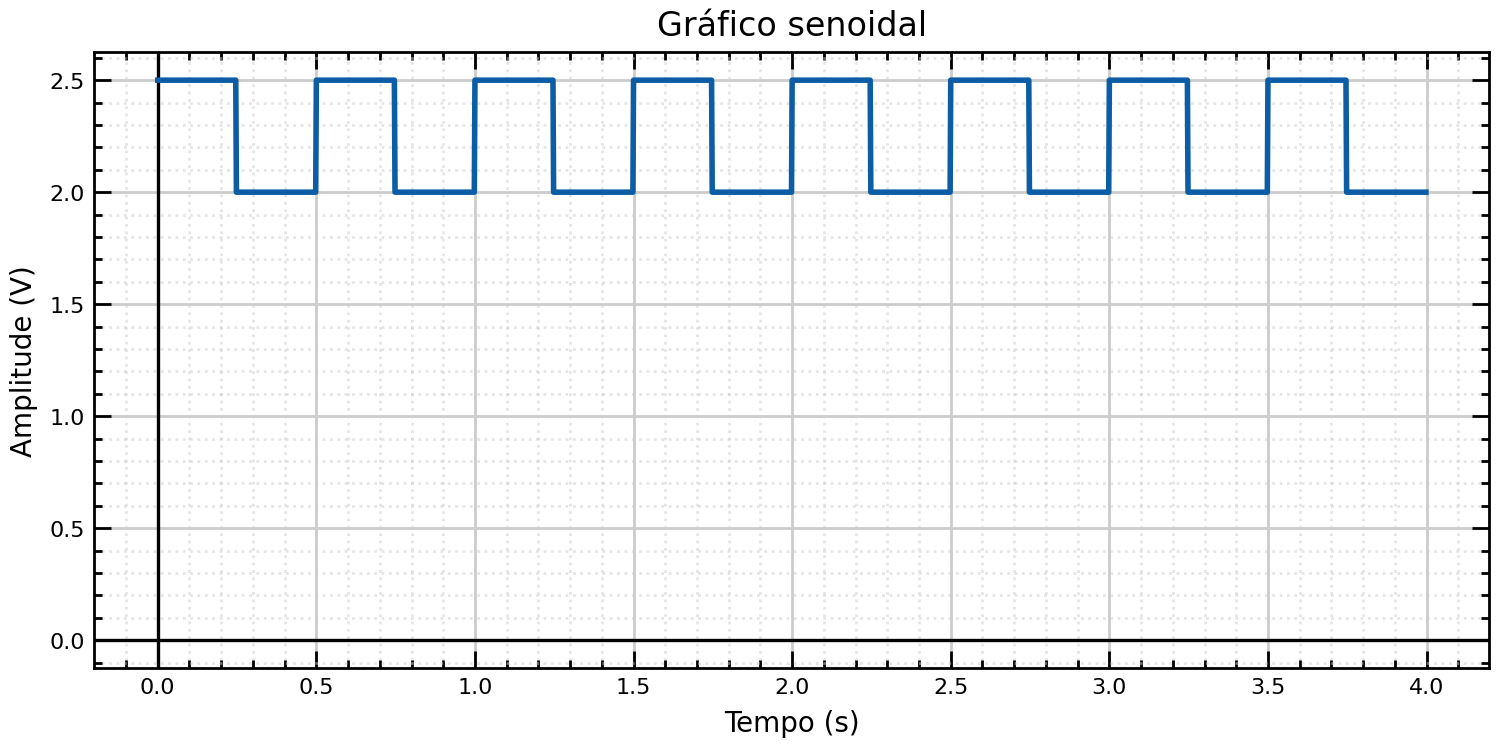

In [9]:
# Parâmetros do sinal
freq = 2
ampl = 0.5
offset = 2

onda_quadrada(freq, ampl, offset, 2000, 20e-4)

In [10]:
def onda_dente_serra(freq, ampl, offset, N=200, Ts=0.002):
    Tsf = 1.0/freq
    print(f"Frequência de Amostragem: {1./Ts}")
    f = 1/Ts
    t = 0
    x = np.zeros(N)
    y = np.zeros(N)
    temp = 0.0
    somar = 1.0/(Tsf/Ts)
    soma = 0
    for i in range(N):
        soma += somar
        if temp < Tsf:
            x[i] = t
            y[i] = ampl*soma + offset
        else:
            soma = 0
            x[i] = t
            y[i] = offset
            temp = 0.0
        temp += Ts
        t += Ts

    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(111)
    ax.axhline(0,color='black', lw=1.2)
    ax.axvline(0,color='black', lw=1.2)
    ax.set_title("Gráfico senoidal", fontsize=12)
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Amplitude (V)")
    ax.plot(x, y)
    plt.grid(which='both')
    plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
    plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)
    plt.show()

Frequência de Amostragem: 500.0


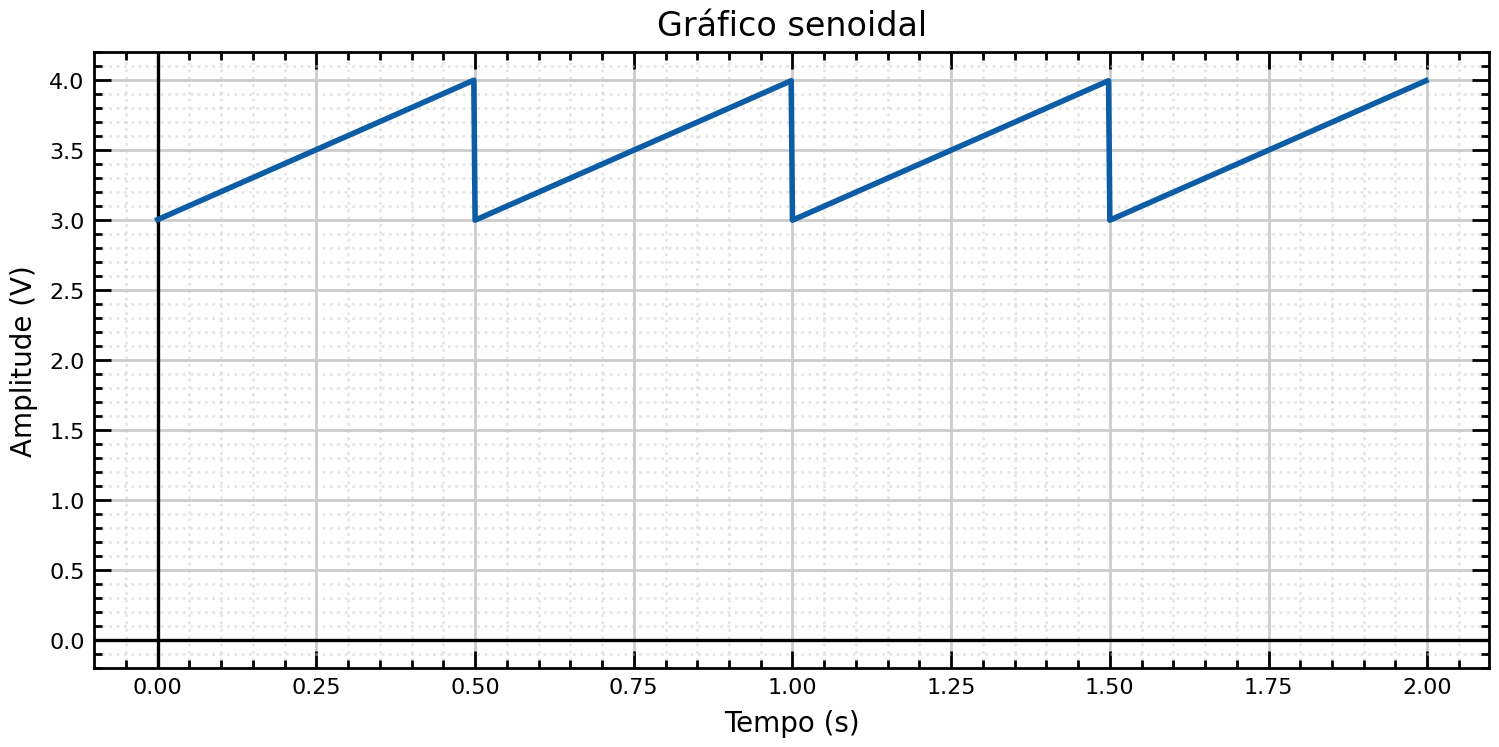

In [11]:
onda_dente_serra(freq=2, ampl=1, offset=3, N=1000, Ts=0.002)

Frequência de Amostragem: 50.0


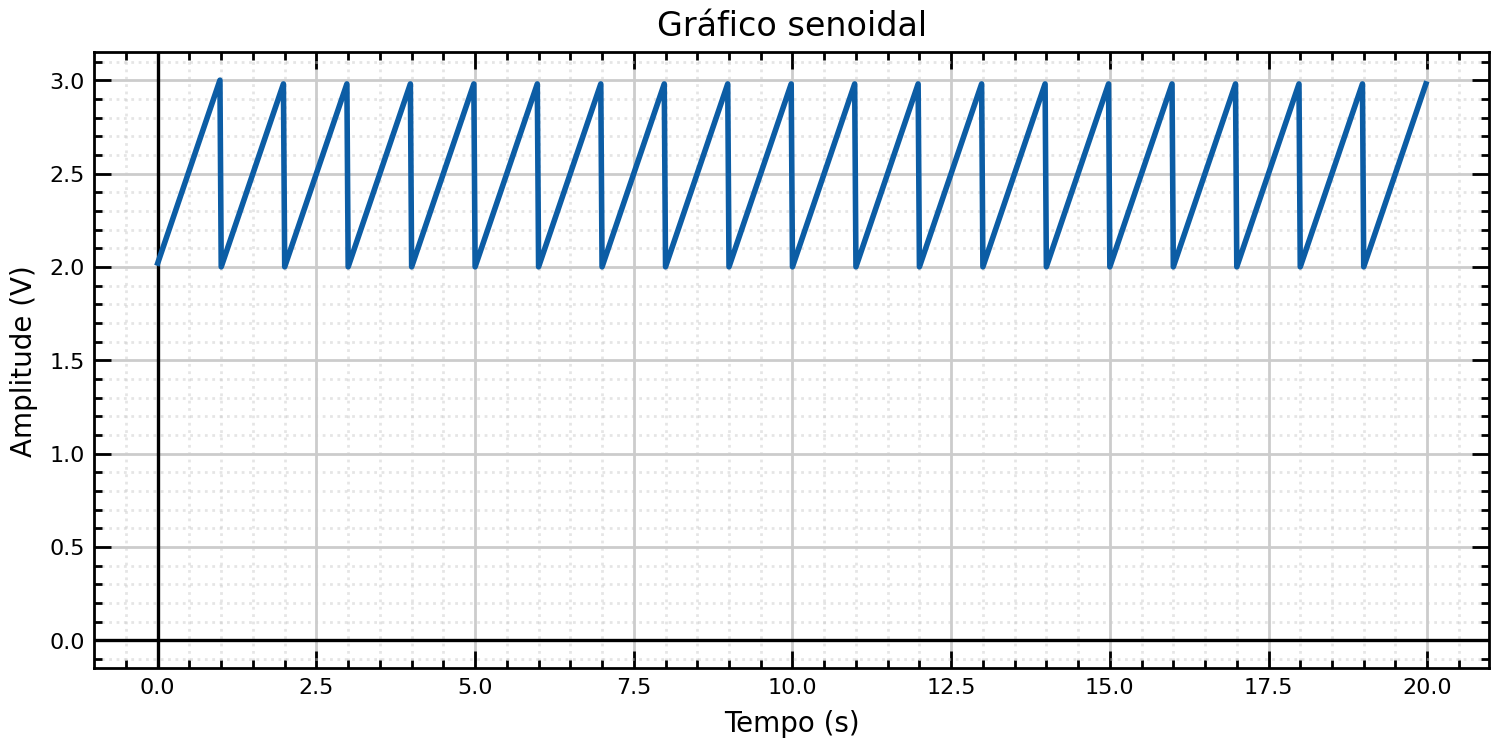

In [12]:
onda_dente_serra(freq=1, ampl=1, offset=2, N=1000, Ts=0.02)

## Sinal PRBS

In [25]:
from random import sample


def onda_prbs(freq, ampl, offset, N=200, Ts=0.002):
    Tsf_base = 1.0/freq
    Tsfs = [Tsf_base, Tsf_base/1.5, Tsf_base/2, Tsf_base/2.5, Tsf_base/3]#, Tsf_base/4, Tsf_base/5, Tsf_base/6, Tsf_base/7]
    print(f"Frequência de Amostragem: {1./Ts}")

    t = 0
    x = np.zeros(N)
    y = np.zeros(N)
    temp = 0.0
    Tsf = 0.0
    
    for i in range(N):
        temp += Ts
        if temp <= Tsf/2:
            x[i] = t
            y[i] = ampl + offset
        if temp >= Tsf/2:
            x[i] = t
            y[i] = offset
        if temp >= Tsf:
            temp = 0.0
            Tsf = sample(Tsfs, 1)[0]
        t += Ts

    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(111)
    ax.axhline(0,color='black', lw=1.2)
    ax.axvline(0,color='black', lw=1.2)
    ax.set_title("Gráfico Sinal PRBS", fontsize=12)
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Amplitude (V)")
    ax.plot(x, y)
    plt.grid(which='both')
    plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
    plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)
    plt.show()
    return x, y

Frequência de Amostragem: 500.0


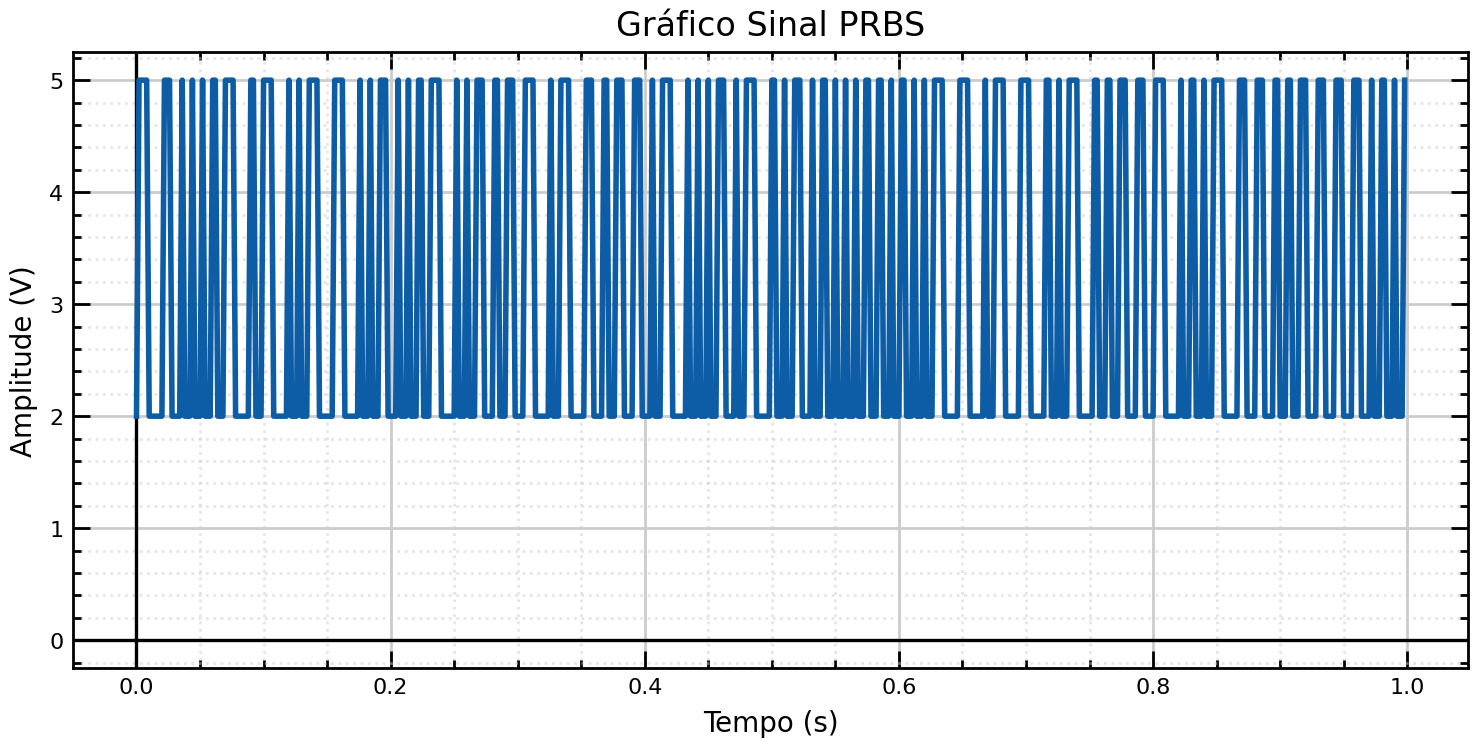

In [27]:
# Parâmetros do sinal
freq = 50
ampl = 3
offset = 2
N = 500

x, u1 = onda_prbs(freq, ampl, offset, N, 20e-4);

## Teste do Sinal PRBS

In [28]:
from scipy import signal as sg
import matplotlib.pyplot as plt

In [29]:
m, b, k = 1.0, 0.5, 0.8
num, den = 1, [m, b, k]

G = sg.TransferFunction(num,den)
Ts = 0.02
t = Ts*np.arange(0, N)
y = sg.step(G, T = t)[1]

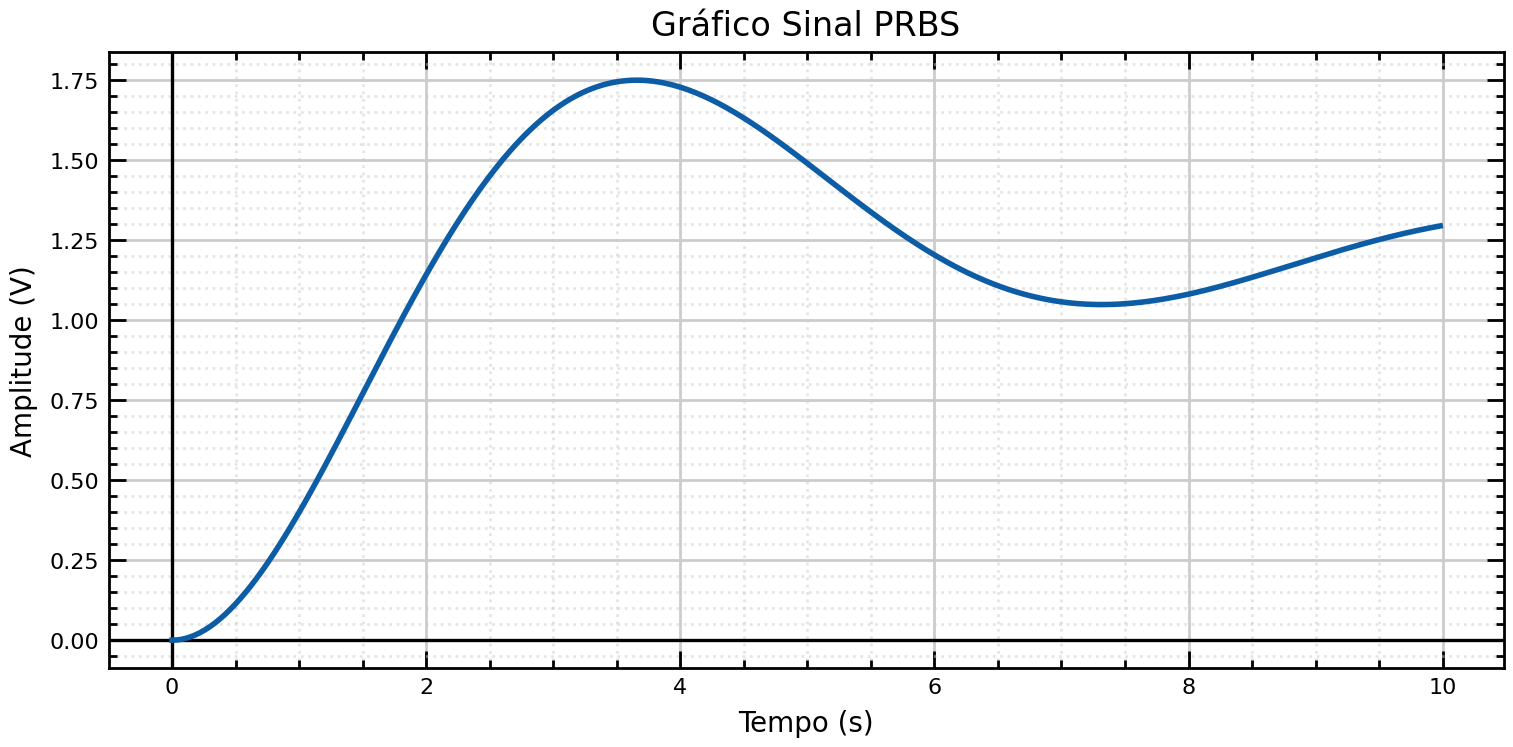

In [30]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(111)
ax.axhline(0,color='black', lw=1.2)
ax.axvline(0,color='black', lw=1.2)
ax.set_title("Gráfico Sinal PRBS", fontsize=12)
ax.set_xlabel("Tempo (s)")
ax.set_ylabel("Amplitude (V)")
ax.plot(t,y)
plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)
plt.show()

In [31]:
# Geração do sinal PRBS:
# u = 2*(sg.max_len_seq(8)[0]-0.5)
Ns = 5                  # Número de vezes que cada amostra será repetida na sequência;
v = np.ones(Ns)       
u1 = np.kron(u1, v)        
N = len(u1)
Ts = 0.2
t = Ts*np.arange(0,N)
yout = np.squeeze(sg.lsim(G, u1, T = t)[1])

In [32]:
u1


array([2., 2., 2., ..., 5., 5., 5.])

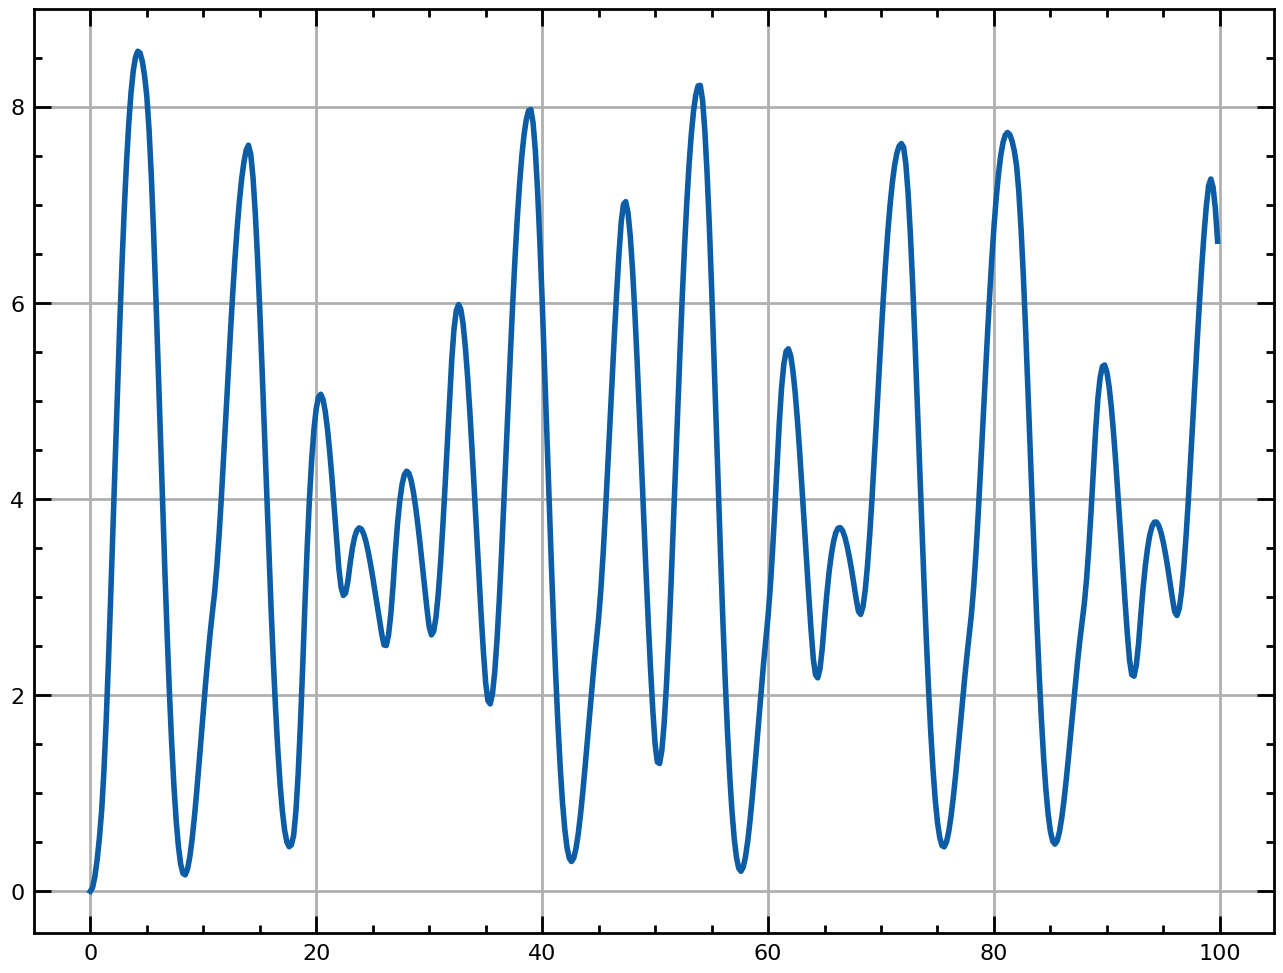

In [33]:
plt.plot(t[:500], yout[:500])
plt.grid()
plt.show()

In [34]:
percIdent = 0.6         # Percentual dos dados de identificação:
Ni = int(percIdent*N)   # Quantidade de amostras para identificação:
Ni

1500

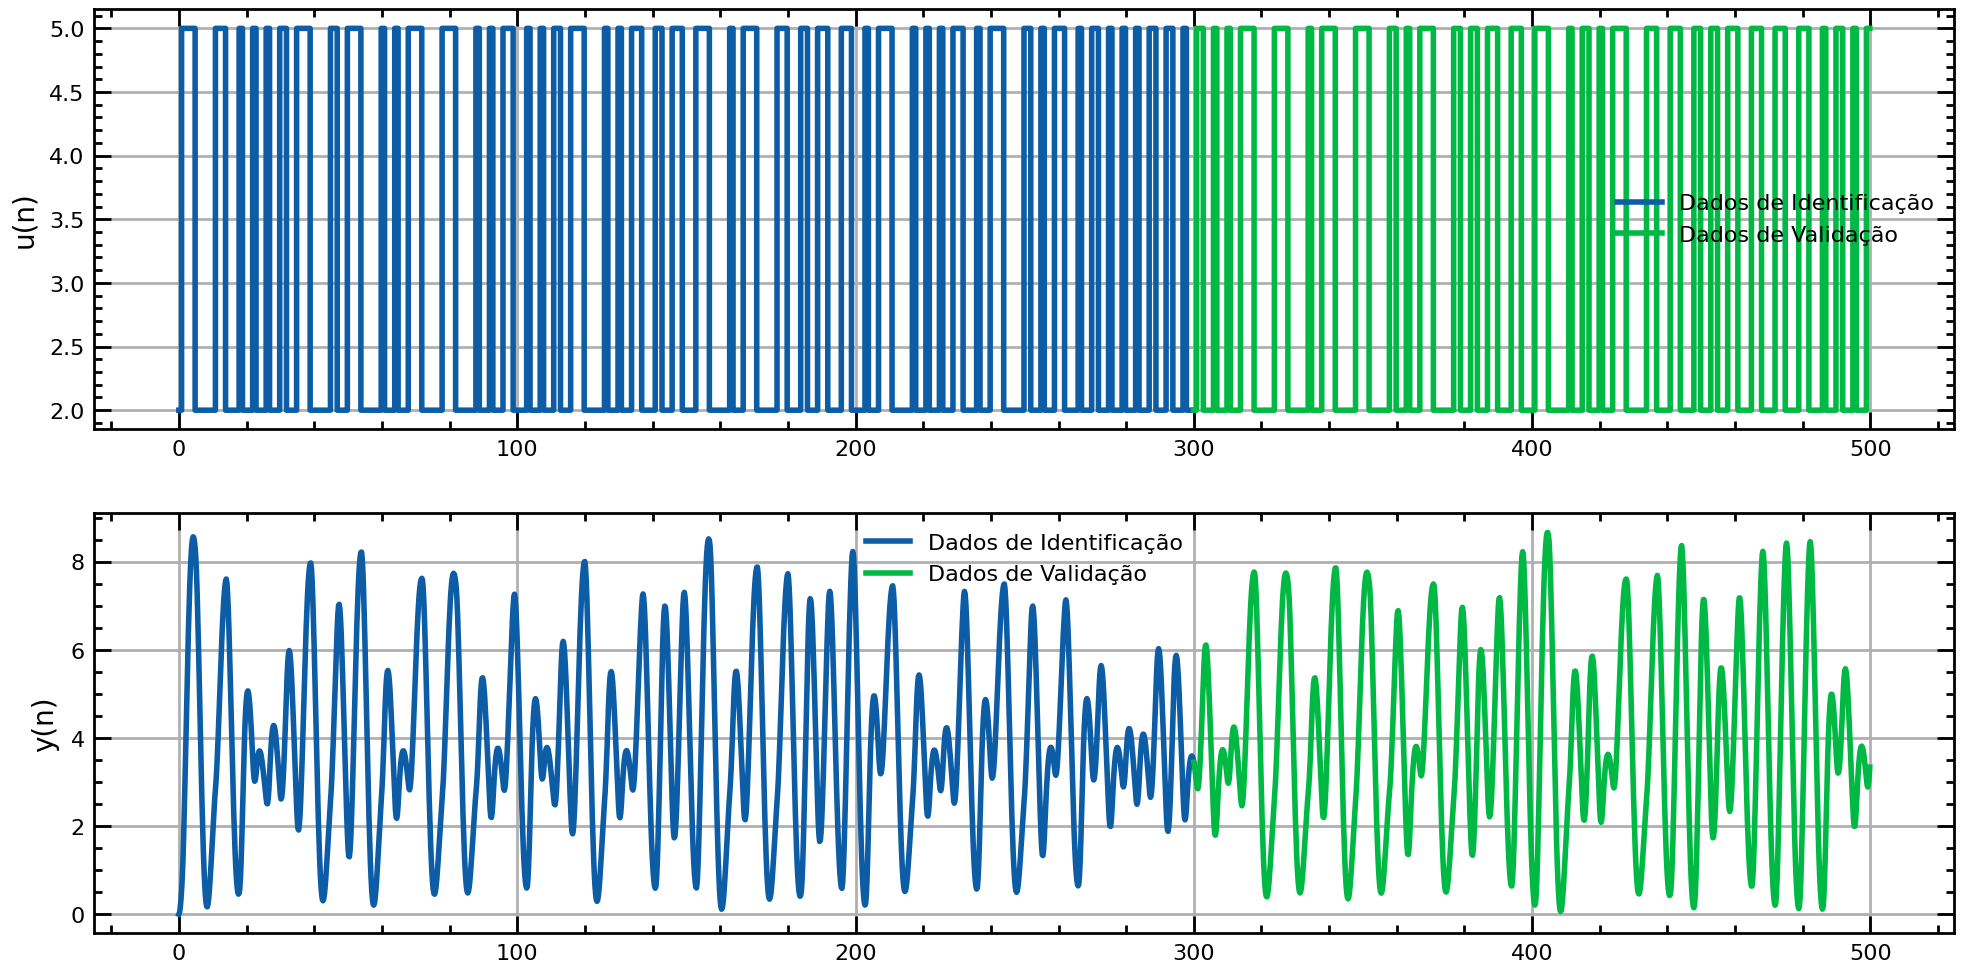

In [35]:
plt.figure(figsize = (12,6))
plt.subplot(211)
plt.step(t[:Ni+1],u1[:Ni+1],label='Dados de Identificação')
plt.step(t[Ni:],u1[Ni:],label='Dados de Validação')
plt.ylabel('u(n)')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(t[:Ni+1],yout[:Ni+1], label='Dados de Identificação')
plt.plot(t[Ni:],yout[Ni:],label='Dados de Validação')
plt.legend()
plt.grid()
plt.ylabel('y(n)')
plt.show()

In [36]:
# Matriz de regressão:
nb = 3
na = 2
ni = np.arange(na, Ni + na)
M = np.zeros((Ni, na + nb))

# Para regressores de y:
for l in np.arange(0, na):
  M[:, l] = yout[ni - l - 1]

# Para regressores de u:
for l in np.arange(0, nb):
  M[:,na+l] = u1[ni-l]

print(M.shape)
# Mínimos quadrados
thetaA = np.linalg.inv(M.T@M)@M.T@yout[ni]
thetaA

(1500, 5)


array([ 1.8744665 , -0.90483742,  0.00649297,  0.02529453,  0.00617615])

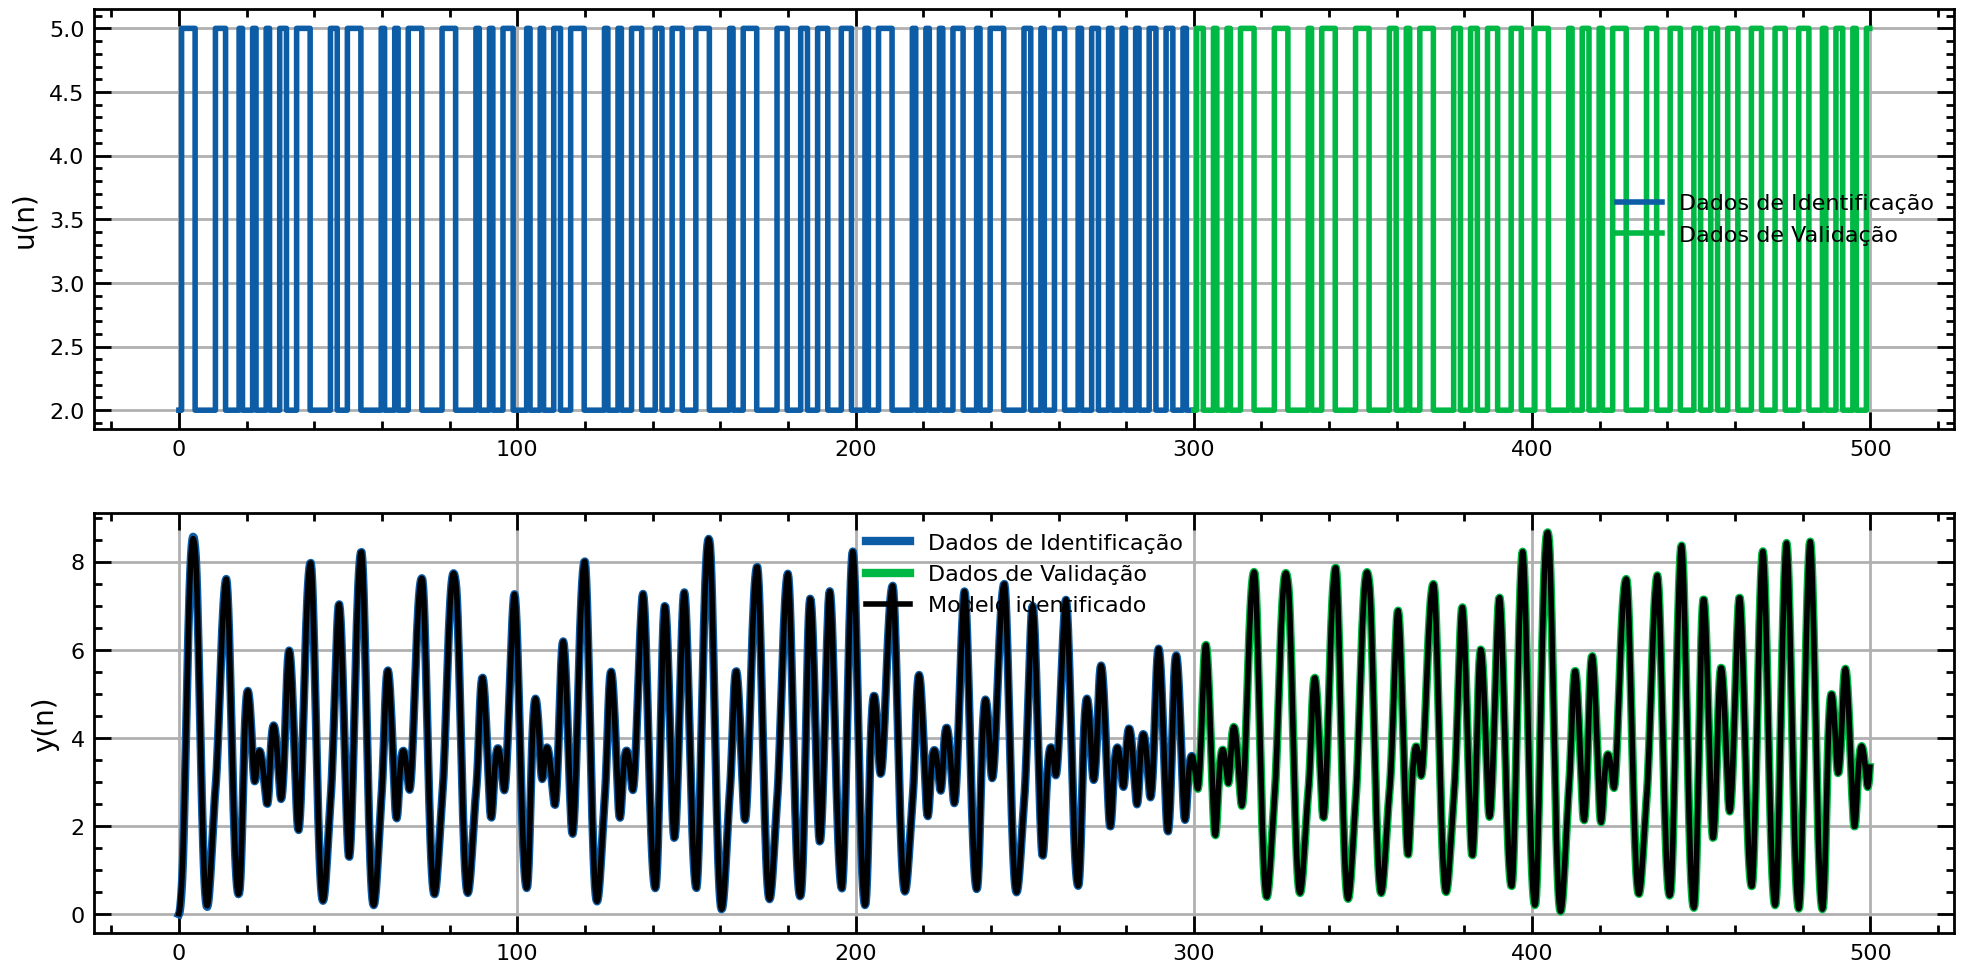

TransferFunctionDiscrete(
array([0.00649297, 0.02529453, 0.00617615]),
array([ 1.        , -1.8744665 ,  0.90483742]),
dt: 0.2
)


In [37]:
a1 = thetaA[0]
a2 = thetaA[1]
b0 = thetaA[2]
b1 = thetaA[3]
b2 = thetaA[4]
Ba = [b0 , b1, b2]
Aa = [1, -a1, -a2]


Gi = sg.TransferFunction(Ba,Aa, dt = Ts)

# Resposta do modelo identificado:
yp = np.squeeze(sg.dlsim(Gi, u1, t = t)[1])

plt.figure(figsize = (12,6))
plt.subplot(211)
plt.step(t[:Ni+1],u1[:Ni+1],label='Dados de Identificação')
plt.step(t[Ni:],u1[Ni:],label='Dados de Validação')
plt.ylabel('u(n)')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(t[:Ni+1],yout[:Ni+1],linewidth = 3.0,label='Dados de Identificação')
plt.plot(t[Ni:],yout[Ni:],linewidth = 3.0,label='Dados de Validação')
plt.plot(t,yp,'k',label='Modelo identificado')
plt.legend()
plt.grid()
plt.ylabel('y(n)')
plt.show()

print(Gi)